  # Hierarchical Text Classification using BERT-CNN 
  `Wulantika Nuraeni - 23520045`
  <br/>
  `Muhammad Anwari Leksono - 23520050`
  <br/>
  ________________
  
  Klasifikasi hirarki genre berdasarkan blurb atau deskripsi buku. Dataset yang digunakan adalah dataset dari GermEval 2019 Task 1.
  Faktor yang diobservasi adalah : 
  1. Input representasi menggunakan pre-trained BERT dan pre-trained fastText. 
  2. Convolutional block CNN

In [2]:
from string import punctuation
from bs4 import BeautifulSoup
from stop_words import get_stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc,classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from IPython.display import display, HTML
import pandas as pd 
import pickle

#load train or test data
def load_data(path):
    doc = open(path,encoding='utf8').read()
    xmldata = BeautifulSoup(doc, "html.parser")

    data = []
    for book in xmldata.findAll('book'):
        parse_xml = BeautifulSoup(str(book),"html.parser")
        blurb = str(parse_xml.find('body').string)
        topcategory = str(parse_xml.find("topic",{"d":"0"}).string)
        data.append((blurb, topcategory))

    return data

#train data
train_data = load_data('blurbs_train.txt')
text_train = [text[0] for text in train_data]
y_train = [text[1] for text in train_data]

#dev/validation data
validation_data = load_data('blurbs_dev.txt')
text_validation = [text[0] for text in validation_data]
y_validation = [text[1] for text in validation_data]


#test data
test_data = load_data('blurbs_test.txt')
text_test = [text[0] for text in test_data]
y_test = [text[1] for text in test_data]


In [3]:
labels = [y_train, y_validation, y_test]
titles = ['Train Label', 'Validation Label', 'Test Label']

plt.figure(figsize=(20,8))

#plot train label
ax = plt.subplot(1,3,1)
plt.hist(x=y_train, bins=15)
plt.title('Train Label Histogram',fontsize=15)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

#plot validation label
plt.subplot(1,3,2)
plt.hist(x=y_validation, bins=15)
plt.title('Holdout Label Histogram',fontsize=15)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

#plot test label
plt.subplot(1,3,3)
plt.hist(x=y_test, bins=15)
plt.title('Test Label Histogram',fontsize=15)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

pickle.dump(ax, open('myplot.pickle', 'wb'))
plt.close()


## Sebaran label dalam data training, validation dan test
____

Grafik di bawah menunjukan sebaran target label atau kategori buku dalam dataset

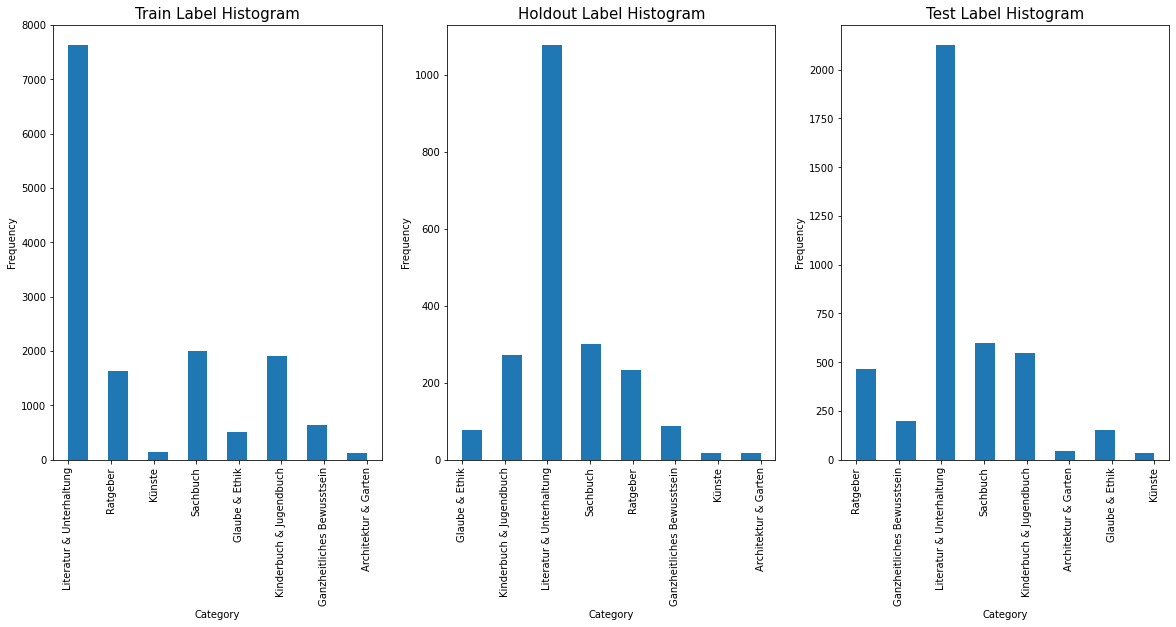

In [91]:
ax = pickle.load(open('myplot.pickle','rb'))
plt.show()

## Penanganan Imbalance dataset 
____
Berdasarkan hasil grafik di atas dapat dilihat bahwa dalam keseluruhan dataset, kategori buku `Literatur & Unterhaltung` mendominasi.
Untuk menangani ini, oversampling akan dilakukan. Dengan menduplikasi data yang minor diharapkan akan didapat sebaran yang lebih merata. Undersampling tidak diambil untuk menangani imbalance data disini, karena dengan undersampling data dengan major kategori `Literatur & Unterhaltung`  akan dihapus sehingga akan menghilangkan beberapa informasi.

In [5]:
from collections import Counter
#from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import numpy as np

stopwords = get_stop_words('de') + list(punctuation)
wordvectorizer = TfidfVectorizer(stop_words=stopwords)
wordvectorizer.fit(text_train)
X_train = wordvectorizer.transform(text_train)

print(Counter(y_train))
# define oversampling strategy
oversample = SMOTE()
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_over))

Counter({'Literatur & Unterhaltung': 7622, 'Sachbuch': 1999, 'Kinderbuch & Jugendbuch': 1897, 'Ratgeber': 1630, 'Ganzheitliches Bewusstsein': 638, 'Glaube & Ethik': 502, 'Künste': 133, 'Architektur & Garten': 127})
Counter({'Literatur & Unterhaltung': 7622, 'Ratgeber': 7622, 'Künste': 7622, 'Sachbuch': 7622, 'Glaube & Ethik': 7622, 'Kinderbuch & Jugendbuch': 7622, 'Ganzheitliches Bewusstsein': 7622, 'Architektur & Garten': 7622})


## Input representasi menggunakan pre-trained BERT
_______

In [9]:
from transformers import BertTokenizer, BertModel
import os

tokenizer = BertTokenizer.from_pretrained("bert-base-german-cased")
save_path = "bert_base_german_uncased/"
if not os.path.exists(save_path):
    os.makedirs(save_path)
tokenizer.save_pretrained(save_path)

print (text_train)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Pre-process multi label
____


## Training
_____


## Validation untuk mencari model terbaik
____


## Test dengan model terbaik
____


## Analisa
___
